In [1]:
import numpy as np
import pandas as pd
import sklearn
import catboost

In [2]:
seed = 33
np.random.seed(seed)

In [3]:
path = "/Users/thrilok/Desktop/mantra_collab_job/work_files/latest_broko_code"
df = pd.read_csv(path  + "/Dataset/05-10-2023/input/PEEL RES.csv")
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Municipality               14561 non-null  object 
 1   Community                  14561 non-null  object 
 2   ML_Number                  14561 non-null  object 
 3   Type                       14561 non-null  object 
 4   type_det                   14561 non-null  int64  
 5   type_semidet               14561 non-null  int64  
 6   type_det-2                 14561 non-null  int64  
 7   type_att_row_twnhouse      14561 non-null  int64  
 8   style_2_storey             14561 non-null  int64  
 9   style_3_storey             14561 non-null  int64  
 10  style_bungalow             14561 non-null  int64  
 11  style_backsplit_3          14561 non-null  int64  
 12  style_backsplit_4          14561 non-null  int64  
 13  style_backsplit_5          14561 non-null  int

In [12]:
df_thres = df[df['latest_price'] > 50000]
drop_cols = ["ML_Number","Municipality","Community","Exterior2","Type",
"type_det","type_semidet","type_det-2","type_att_row_twnhouse","Type-2","style_2_storey",
"style_3_storey","style_bungalow","style_backsplit_3","style_backsplit_4","style_backsplit_5","sidesplit_3","sidesplit_4","sidesplit_5","style_other","Style","Lot_Front_Log","Lot_Depth_Log","Tax_Year","Approx_Age","Approx_Square_Footage",
"Approx_Square_Footage_Min","Approx_Square_Footage_Max","Bedroom_Log","Bedroom_SQRT","Bedrooms_","Exterior2","Laundry_Access","Sold_Price",
"lat_hpi","lat_month","his_month","index_hpi","month_str","Sold_Date","washrooms"]#,"Taxes","Bedrooms","Kitchens","main_full","main_half","upeer_full","upper_half","basement_full","basement_half"]
data = df_thres.drop(drop_cols, axis=1)
data.isnull().sum()
data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 14556 entries, 0 to 14560
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   main_full            14556 non-null  int64  
 1   main_half            14556 non-null  int64  
 2   upeer_full           14556 non-null  int64  
 3   upper_half           14556 non-null  int64  
 4   basement_full        14556 non-null  int64  
 5   basement_half        14556 non-null  int64  
 6   Lot_Front            14556 non-null  int64  
 7   Lot_Depth            14556 non-null  int64  
 8   Taxes                14556 non-null  int64  
 9   Bedrooms             14556 non-null  int64  
 10  Exterior1            14551 non-null  object 
 11  Kitchens             14556 non-null  int64  
 12  Garage_Type          13250 non-null  object 
 13  basement_type        14556 non-null  object 
 14  basement_entrance    14556 non-null  object 
 15  basement_finished    14556 non-null  obje

In [13]:
data = data.dropna(axis = 0, how ='any') 
data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 13245 entries, 0 to 14560
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   main_full            13245 non-null  int64  
 1   main_half            13245 non-null  int64  
 2   upeer_full           13245 non-null  int64  
 3   upper_half           13245 non-null  int64  
 4   basement_full        13245 non-null  int64  
 5   basement_half        13245 non-null  int64  
 6   Lot_Front            13245 non-null  int64  
 7   Lot_Depth            13245 non-null  int64  
 8   Taxes                13245 non-null  int64  
 9   Bedrooms             13245 non-null  int64  
 10  Exterior1            13245 non-null  object 
 11  Kitchens             13245 non-null  int64  
 12  Garage_Type          13245 non-null  object 
 13  basement_type        13245 non-null  object 
 14  basement_entrance    13245 non-null  object 
 15  basement_finished    13245 non-null  obje

In [14]:
q1 = data['latest_price'].quantile(0.25)
q3 = data['latest_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound_outliers = data[data['latest_price'] < lower_bound] 
upper_bound_outliers = data[data['latest_price'] > upper_bound]
# lower_bound_outliers.to_csv(path + '/Dataset/01-10-2023/lower_bound_outliers.csv',index=False)
# upper_bound_outliers.to_csv(path +'/Dataset/01-10-2023/upper_bound_outliers.csv',index=False)    
dataset = data[(data['latest_price'] >= lower_bound) & (data['latest_price'] <= upper_bound)]


In [17]:
X = dataset.drop('latest_price',axis=1)
y = dataset['latest_price']

In [18]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 12553 entries, 0 to 14560
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   main_full            12553 non-null  int64  
 1   main_half            12553 non-null  int64  
 2   upeer_full           12553 non-null  int64  
 3   upper_half           12553 non-null  int64  
 4   basement_full        12553 non-null  int64  
 5   basement_half        12553 non-null  int64  
 6   Lot_Front            12553 non-null  int64  
 7   Lot_Depth            12553 non-null  int64  
 8   Taxes                12553 non-null  int64  
 9   Bedrooms             12553 non-null  int64  
 10  Exterior1            12553 non-null  object 
 11  Kitchens             12553 non-null  int64  
 12  Garage_Type          12553 non-null  object 
 13  basement_type        12553 non-null  object 
 14  basement_entrance    12553 non-null  object 
 15  basement_finished    12553 non-null  obje

In [19]:
feature_names = list(X.columns)
n_features  = len(feature_names)
numerical_features = [column for column, dtype in X.dtypes.items() if dtype!=object]
numerical_features


['main_full',
 'main_half',
 'upeer_full',
 'upper_half',
 'basement_full',
 'basement_half',
 'Lot_Front',
 'Lot_Depth',
 'Taxes',
 'Bedrooms',
 'Kitchens',
 'lat_benchmark_price',
 'High',
 'Medium',
 'Low',
 'Neutral',
 'Negetive']

In [20]:
numerical_features.remove("lat_benchmark_price")
numerical_features.remove("Taxes")
numerical_features.remove("Lot_Front")
numerical_features.remove("Lot_Depth")

In [21]:
X[numerical_features] = X[numerical_features].astype(object)

In [22]:
cat_features = [column for column, dtype in X.dtypes.items() if dtype==object]
cat_features

['main_full',
 'main_half',
 'upeer_full',
 'upper_half',
 'basement_full',
 'basement_half',
 'Bedrooms',
 'Exterior1',
 'Kitchens',
 'Garage_Type',
 'basement_type',
 'basement_entrance',
 'basement_finished',
 'High',
 'Medium',
 'Low',
 'Neutral',
 'Negetive']

In [23]:
small_pool = catboost.Pool(X, y, cat_features=cat_features, feature_names=feature_names)

In [24]:
iterations_count=10

In [25]:
common_params = {
    'random_seed': seed,
    'grow_policy': 'Lossguide',
    'objective': 'RMSE',
    'iterations': iterations_count,
    'depth': n_features-1,
}

In [26]:
cb_wo_penalties = catboost.CatBoostRegressor(
    **common_params,one_hot_max_size=60000
)

In [27]:
cb_wo_penalties.fit(small_pool)

Learning rate set to 0.5
0:	learn: 213653.9588026	total: 63.5ms	remaining: 572ms
1:	learn: 175146.8756612	total: 68.5ms	remaining: 274ms
2:	learn: 158509.8433762	total: 72.5ms	remaining: 169ms
3:	learn: 151954.9271467	total: 77.3ms	remaining: 116ms
4:	learn: 146703.0403842	total: 82.8ms	remaining: 82.8ms
5:	learn: 144056.4406643	total: 87.6ms	remaining: 58.4ms
6:	learn: 142445.0882463	total: 92.4ms	remaining: 39.6ms
7:	learn: 140590.3586554	total: 97.7ms	remaining: 24.4ms
8:	learn: 138917.0367859	total: 104ms	remaining: 11.5ms
9:	learn: 137351.2692302	total: 110ms	remaining: 0us


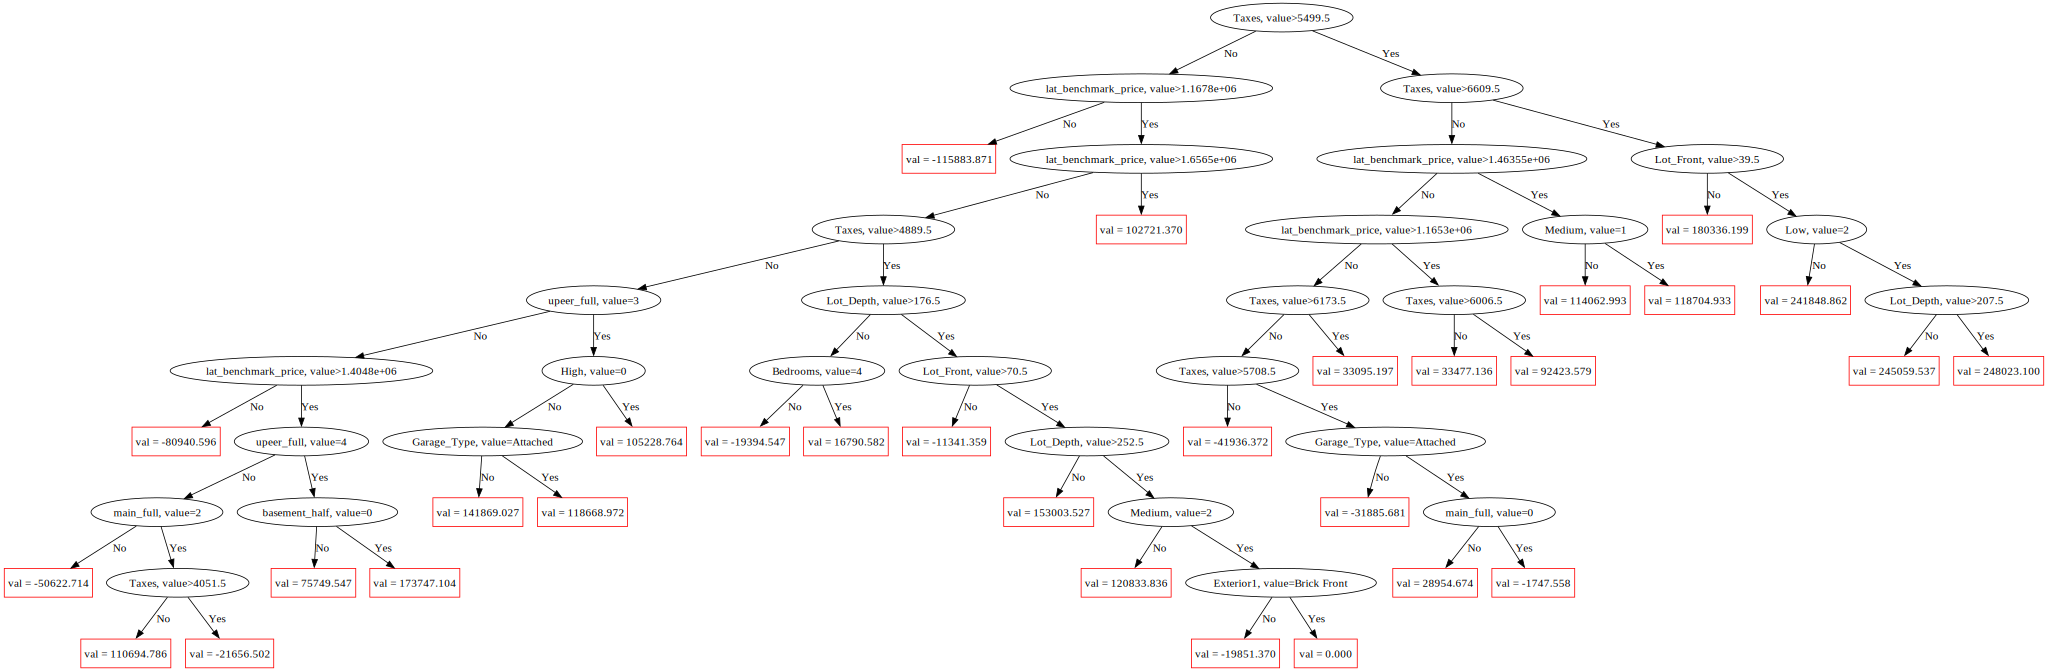

In [28]:
cb_wo_penalties.plot_tree(tree_idx=0, pool=small_pool)

In [29]:
def get_penalties(n_features, base=1.3):
    return list([base**lvl for lvl in range(n_features)])

In [30]:
cb_with_penalties = catboost.CatBoostRegressor(
    **common_params,
    penalties_coefficient=0.001,
    per_object_feature_penalties=get_penalties(n_features),
    one_hot_max_size=60000
)

In [31]:
cb_with_penalties.fit(small_pool)

Learning rate set to 0.5
0:	learn: 213653.9588026	total: 8.24ms	remaining: 74.2ms
1:	learn: 175146.8756612	total: 16.7ms	remaining: 67ms
2:	learn: 158509.8433762	total: 22.7ms	remaining: 52.9ms
3:	learn: 151954.9271467	total: 29.9ms	remaining: 44.9ms
4:	learn: 146703.0403842	total: 37.5ms	remaining: 37.5ms
5:	learn: 144056.4406643	total: 42.6ms	remaining: 28.4ms
6:	learn: 142445.0882463	total: 47.5ms	remaining: 20.4ms
7:	learn: 140590.3586554	total: 53.6ms	remaining: 13.4ms
8:	learn: 138917.0367859	total: 59.8ms	remaining: 6.64ms
9:	learn: 137351.2692302	total: 66ms	remaining: 0us


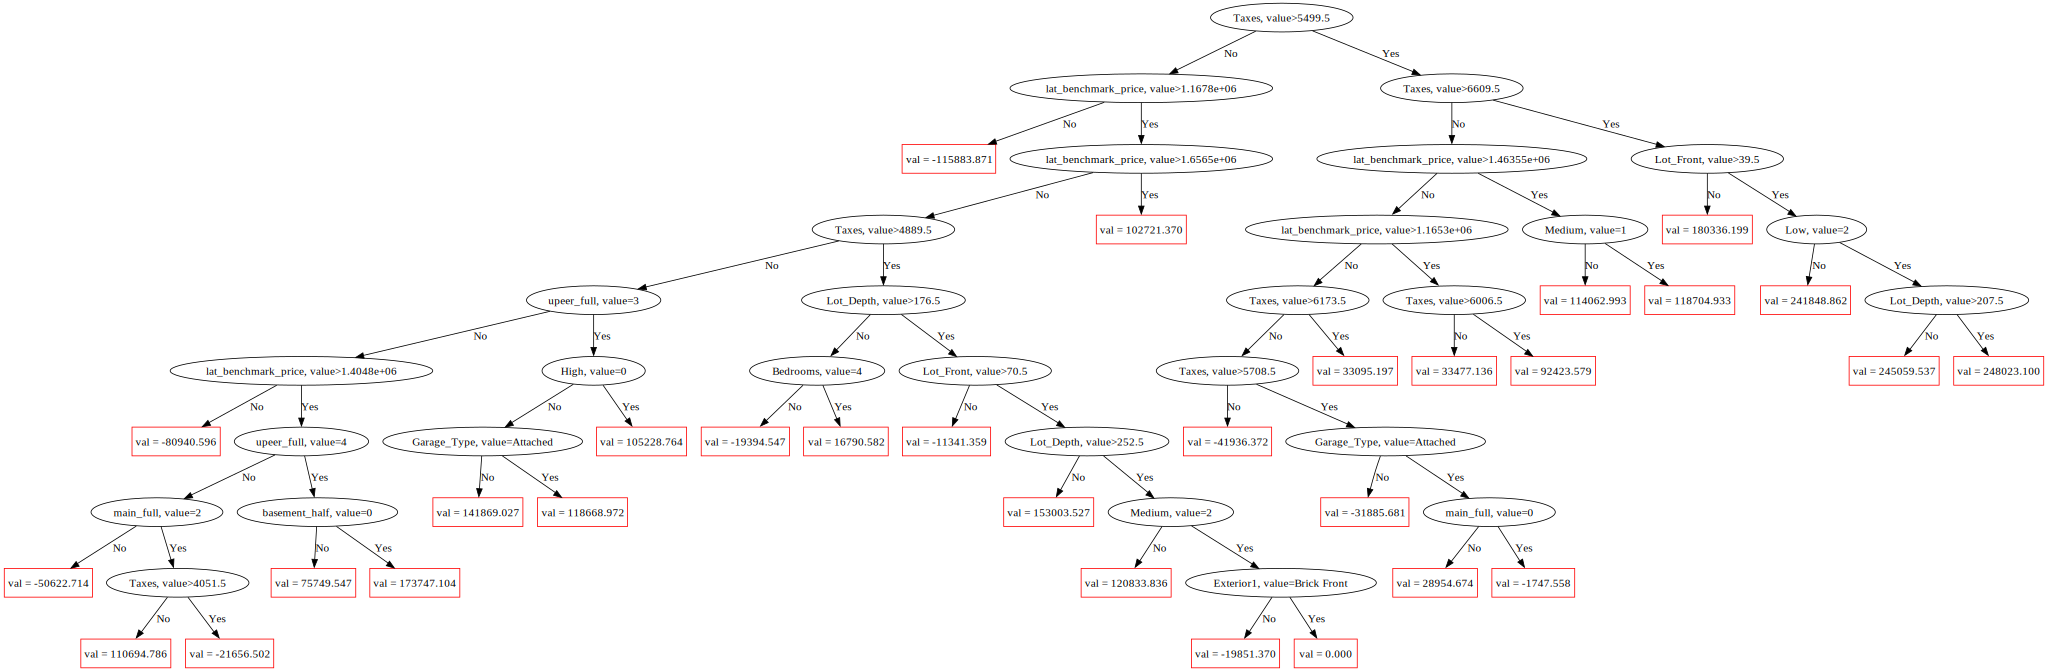

In [32]:
cb_with_penalties.plot_tree(tree_idx=0, pool=small_pool)

In [33]:
def get_weights(n_features, base=1.1):
    return list([(1/base)**lvl for lvl in range(n_features)])

In [34]:
cb_with_weights = catboost.CatBoostRegressor(
    **common_params,
    feature_weights=get_weights(n_features),
    one_hot_max_size=60000
)

In [35]:
cb_with_weights.fit(small_pool)

Learning rate set to 0.5
0:	learn: 218450.4049001	total: 7.58ms	remaining: 68.2ms
1:	learn: 182499.4057639	total: 15.8ms	remaining: 63.3ms
2:	learn: 165580.7498674	total: 23.4ms	remaining: 54.5ms
3:	learn: 157079.0854409	total: 30.3ms	remaining: 45.5ms
4:	learn: 152141.0485653	total: 36.4ms	remaining: 36.4ms
5:	learn: 148267.3967233	total: 50.9ms	remaining: 34ms
6:	learn: 146261.6874395	total: 63.2ms	remaining: 27.1ms
7:	learn: 144181.6737216	total: 71.9ms	remaining: 18ms
8:	learn: 143306.5831118	total: 82ms	remaining: 9.11ms
9:	learn: 142213.7048243	total: 88.5ms	remaining: 0us


In [36]:
# Get the number of trees
num_trees = cb_with_weights.get_best_iteration()

print("The model has", num_trees, "trees.")

The model has None trees.


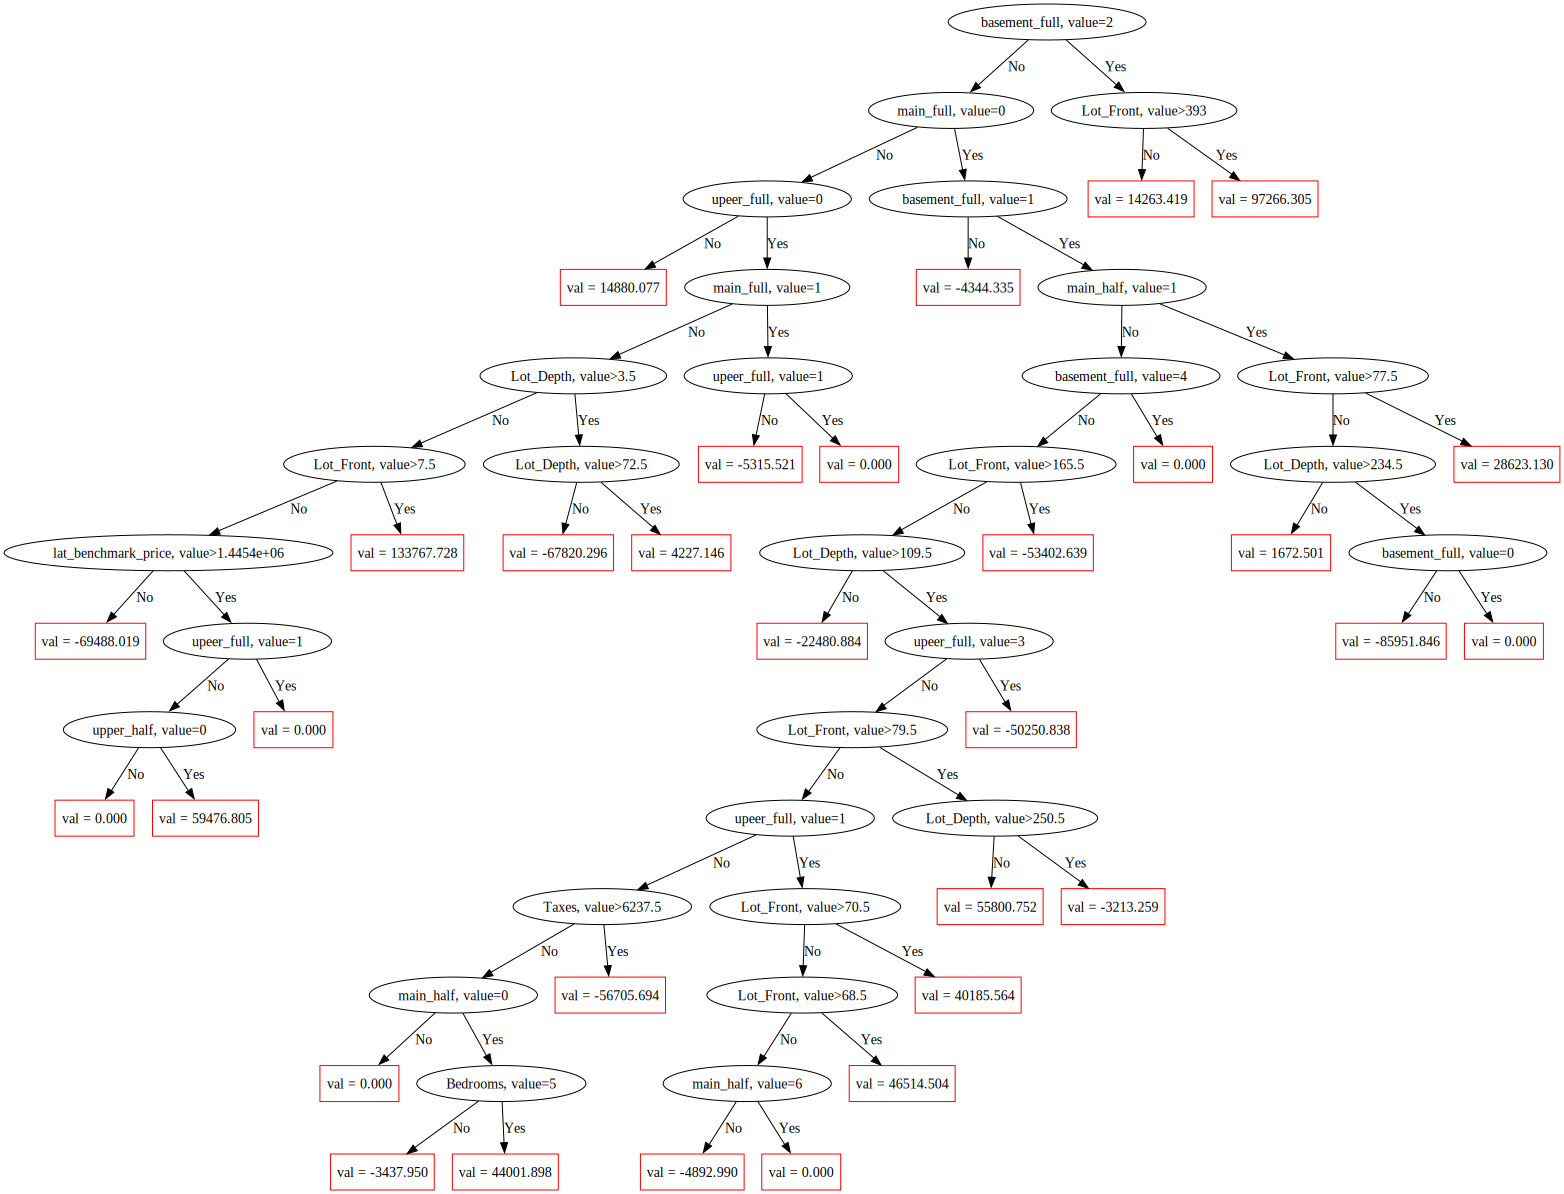

In [37]:
cb_with_weights.plot_tree(tree_idx=8, pool=small_pool)

In [38]:
def get_fs_col_name(feature_idx):
    return 'Feature strength of {}'.format(feature_idx)

fs_df = pd.DataFrame(
    data=[
        cb_wo_penalties.get_feature_importance(
            type=catboost.EFstrType.PredictionValuesChange,
            data=small_pool
        ),
        cb_with_penalties.get_feature_importance(
            type=catboost.EFstrType.PredictionValuesChange,
            data=small_pool
        ),
        cb_with_weights.get_feature_importance(
            type=catboost.EFstrType.PredictionValuesChange,
            data=small_pool
        ),
    ],
    # columns=list(map(get_fs_col_name, range(n_features))),
    columns = list(map(get_fs_col_name, X.columns)),

    index=['Simple regressor', 'Regressor with feature penalties', 'Regressor with feature weights']
)
for idx in fs_df.columns:
    fs_df['Relative feature strength {}'.format(idx)] = fs_df[idx] / fs_df[fs_df.columns[0]]

In [39]:
fs_df.columns[0]

'Feature strength of main_full'

In [40]:
fs_df

,Feature strength of main_full,Feature strength of main_half,Feature strength of upeer_full,Feature strength of upper_half,Feature strength of basement_full,Feature strength of basement_half,Feature strength of Lot_Front,Feature strength of Lot_Depth,Feature strength of Taxes,Feature strength of Bedrooms,...,Relative feature strength Feature strength of Garage_Type,Relative feature strength Feature strength of basement_type,Relative feature strength Feature strength of basement_entrance,Relative feature strength Feature strength of basement_finished,Relative feature strength Feature strength of lat_benchmark_price,Relative feature strength Feature strength of High,Relative feature strength Feature strength of Medium,Relative feature strength Feature strength of Low,Relative feature strength Feature strength of Neutral,Relative feature strength Feature strength of Negetive
Simple regressor,0.312500,0.090273,2.637247,0.028567,0.561887,0.050638,1.331549,0.998519,71.263959,2.578551,...,0.142117,0.387089,0.362451,0.96901,61.437579,0.013214,0.05704,0.126521,3.351450e-07,0.012106
Regressor with feature penalties,0.312500,0.090273,2.637247,0.028567,0.561887,0.050638,1.331549,0.998519,71.263959,2.578551,...,0.142117,0.387089,0.362451,0.96901,61.437579,0.013214,0.05704,0.126521,3.351450e-07,0.012106
Regressor with feature weights,0.510852,0.279233,24.919028,0.067203,0.921565,0.081655,4.184318,1.601782,60.742239,0.619463,...,0.027052,0.060275,0.035968,0.00000,11.408273,0.000000,0.00000,0.000000,0.000000e+00,0.000000


In [58]:
fs_df.to_csv(path + '/Dataset/FWB.csv')